# Morphogenetic System Lineage Analysis

This notebook analyzes the telemetry data produced by the adversarial evolution harness, focusing on lineage dynamics, fitness, and population diversity over generations.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import numpy as np

sns.set_theme(style="whitegrid")

## 1. Load Data

First, we load the aggregated run summary data from the `pitch_demo` output.

In [12]:
def load_summaries(run_dir: Path) -> pd.DataFrame:
    """Load all summary.json files from a run directory and aggregate them."""
    summaries = []
    for summary_path in sorted(run_dir.glob('**/*_summary.json')):
        with open(summary_path, 'r') as f:
            data = json.load(f)
            
            scenario_label = summary_path.name.replace('_summary.json', '')
            generation = 0
            if 'gen' in scenario_label:
                try:
                    generation = int(scenario_label.split('-gen')[1].split('-')[0])
                except (IndexError, ValueError):
                    pass # stay at 0 if parsing fails
            
            record = {
                'scenario': scenario_label,
                'generation': generation,
                'scenario_name': data.get('run_metadata', {}).get('scenario_name'),
                'fitness_score': data.get('annotations', {}).get('fitness_score'),
                'lineage_pressure': data.get('annotations', {}).get('lineage_pressure'),
                'lineage_component': data.get('annotations', {}).get('lineage_component'),
                'breach_observed': data.get('annotations', {}).get('breach_observed'),
                'final_cell_count': data.get('run_metadata', {}).get('final_cell_count'),
                'total_replications': data.get('stats', {}).get('total_replications'),
                'total_signals': data.get('stats', {}).get('total_signals'),
            }
            summaries.append(record)
            
    return pd.DataFrame(summaries)

# --- Determine project root and set RUN_DIRECTORY --- 
PROJECT_ROOT = Path('.').resolve().parent
RUN_DIRECTORY = PROJECT_ROOT / "target/pitch_demo" 
NO_CROSSOVER_RUN_DIRECTORY = PROJECT_ROOT / "target/crossover_analysis/no_crossover"
HIGH_CROSSOVER_RUN_DIRECTORY = PROJECT_ROOT / "target/crossover_analysis/high_crossover"
MUTATION_ANALYSIS_RUN_DIRECTORY = PROJECT_ROOT / "target/mutation_analysis/Random"
ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY = PROJECT_ROOT / "target/adaptive_mutation_analysis/true"
ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY = PROJECT_ROOT / "target/adaptive_mutation_analysis/false"
# ----------------------------------------------------------------

if RUN_DIRECTORY.exists():
    df_summary = load_summaries(RUN_DIRECTORY)
    if not df_summary.empty:
        print(f"Loaded {len(df_summary)} summaries from {RUN_DIRECTORY.as_posix()}")
        display(df_summary.head())
    else:
        print(f"No summary.json files found in {RUN_DIRECTORY.as_posix()}")
        df_summary = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/pitch_demo.sh' first.")
    df_summary = pd.DataFrame() # Create an empty dataframe to avoid errors later

if NO_CROSSOVER_RUN_DIRECTORY.exists():
    df_summary_no_crossover = load_summaries(NO_CROSSOVER_RUN_DIRECTORY)
    if not df_summary_no_crossover.empty:
        print(f"Loaded {len(df_summary_no_crossover)} summaries from {NO_CROSSOVER_RUN_DIRECTORY.as_posix()}")
        display(df_summary_no_crossover.head())
    else:
        print(f"No summary.json files found in {NO_CROSSOVER_RUN_DIRECTORY.as_posix()}")
        df_summary_no_crossover = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {NO_CROSSOVER_RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/run_crossover_analysis.sh' first.")
    df_summary_no_crossover = pd.DataFrame() # Create an empty dataframe to avoid errors later

if HIGH_CROSSOVER_RUN_DIRECTORY.exists():
    df_summary_high_crossover = load_summaries(HIGH_CROSSOVER_RUN_DIRECTORY)
    if not df_summary_high_crossover.empty:
        print(f"Loaded {len(df_summary_high_crossover)} summaries from {HIGH_CROSSOVER_RUN_DIRECTORY.as_posix()}")
        display(df_summary_high_crossover.head())
    else:
        print(f"No summary.json files found in {HIGH_CROSSOVER_RUN_DIRECTORY.as_posix()}")
        df_summary_high_crossover = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {HIGH_CROSSOVER_RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/run_crossover_analysis.sh' first.")
    df_summary_high_crossover = pd.DataFrame() # Create an empty dataframe to avoid errors later

if MUTATION_ANALYSIS_RUN_DIRECTORY.exists():
    df_summary_mutation = load_summaries(MUTATION_ANALYSIS_RUN_DIRECTORY)
    if not df_summary_mutation.empty:
        print(f"Loaded {len(df_summary_mutation)} summaries from {MUTATION_ANALYSIS_RUN_DIRECTORY.as_posix()}")
        display(df_summary_mutation.head())
    else:
        print(f"No summary.json files found in {MUTATION_ANALYSIS_RUN_DIRECTORY.as_posix()}")
        df_summary_mutation = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {MUTATION_ANALYSIS_RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/run_mutation_analysis.sh' first.")
    df_summary_mutation = pd.DataFrame() # Create an empty dataframe to avoid errors later

if ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY.exists():
    df_summary_adaptive_true = load_summaries(ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY)
    if not df_summary_adaptive_true.empty:
        print(f"Loaded {len(df_summary_adaptive_true)} summaries from {ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY.as_posix()}")
        display(df_summary_adaptive_true.head())
    else:
        print(f"No summary.json files found in {ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY.as_posix()}")
        df_summary_adaptive_true = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/run_adaptive_mutation_analysis.sh' first.")
    df_summary_adaptive_true = pd.DataFrame() # Create an empty dataframe to avoid errors later

if ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY.exists():
    df_summary_adaptive_false = load_summaries(ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY)
    if not df_summary_adaptive_false.empty:
        print(f"Loaded {len(df_summary_adaptive_false)} summaries from {ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY.as_posix()}")
        display(df_summary_adaptive_false.head())
    else:
        print(f"No summary.json files found in {ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY.as_posix()}")
        df_summary_adaptive_false = pd.DataFrame() # Create an empty dataframe to avoid errors later
else:
    print(f"Run directory {ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY.as_posix()} not found. Please run 'scripts/run_adaptive_mutation_analysis.sh' first.")
    df_summary_adaptive_false = pd.DataFrame() # Create an empty dataframe to avoid errors later


Loaded 2 summaries from /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/pitch_demo


,scenario,generation,scenario_name,fitness_score,lineage_pressure,lineage_component,breach_observed,final_cell_count,total_replications,total_signals
0,baseline,0,baseline-growth,0.377667,0.2,0.52,True,6,4,2
1,intense,0,intense-defense,0.461083,0.8,0.88,True,16,12,224


No summary.json files found in /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/crossover_analysis/no_crossover
No summary.json files found in /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/crossover_analysis/high_crossover
No summary.json files found in /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/mutation_analysis/Random
No summary.json files found in /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/adaptive_mutation_analysis/true
No summary.json files found in /Users/samarthbhatia/Developer/Systems/morphogenetic-security/target/adaptive_mutation_analysis/false


## 2. Compare Scenarios
This plot helps us understand the difference in fitness and lineage pressure between the `baseline` and `intense` scenarios.

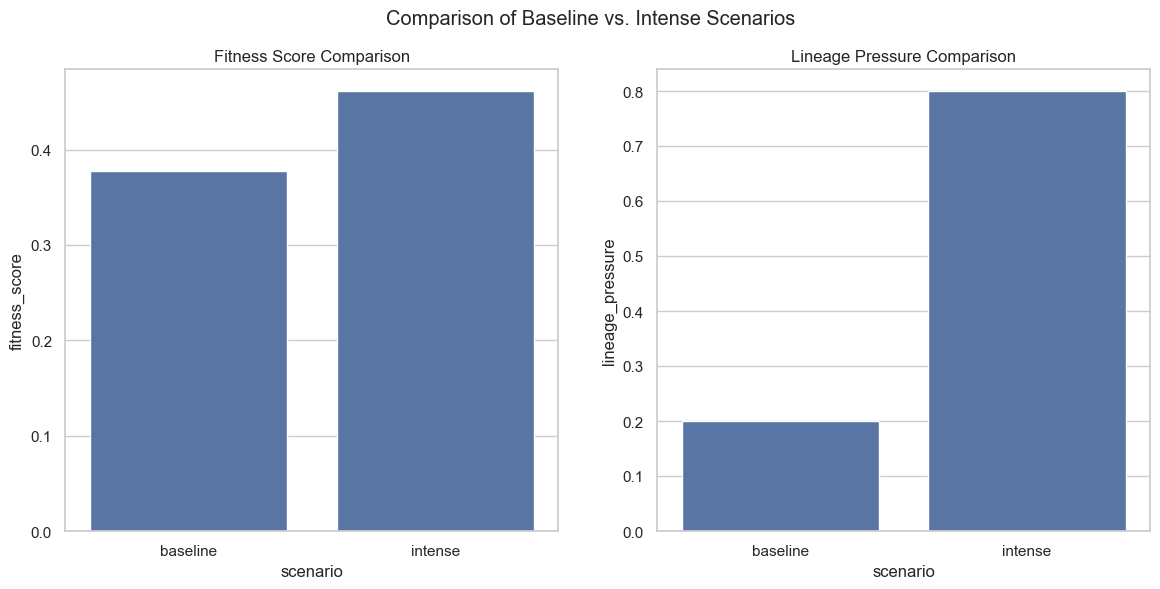

In [13]:
if not df_summary.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.barplot(data=df_summary, x='scenario', y='fitness_score', ax=ax1)
    ax1.set_title('Fitness Score Comparison')

    sns.barplot(data=df_summary, x='scenario', y='lineage_pressure', ax=ax2)
    ax2.set_title('Lineage Pressure Comparison')
    
    fig.suptitle('Comparison of Baseline vs. Intense Scenarios')
    plt.show()
else:
    print("No summary data to plot.")

## 3. Correlation Analysis
A correlation heatmap helps us understand the relationships between different numerical metrics. Note that with only two data points (baseline and intense), this is not statistically significant, but it will become more useful with data from multiple evolutionary generations.

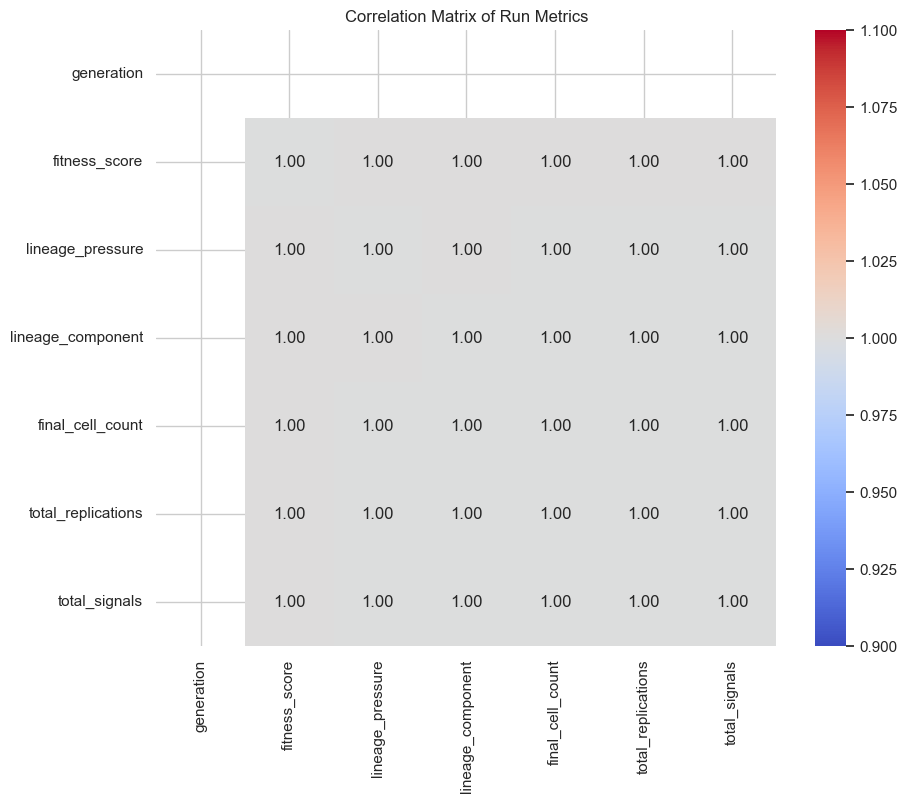

In [14]:
if not df_summary.empty and len(df_summary) > 1:
    plt.figure(figsize=(10, 8))
    corr = df_summary.select_dtypes(include=np.number).corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix of Run Metrics')
    plt.show()
else:
    print("Not enough data for a correlation matrix.")

## 4. Lineage Diversity Analysis (Intense Scenario)

Now we'll load the detailed lineage data for the `intense` scenario to analyze how the population of cell lineages changes over the course of the run.

In [15]:
def load_lineage_data(run_dir: Path, scenario_label: str = "intense") -> pd.DataFrame:
    """Loads a specific lineage CSV file."""
    lineage_file = run_dir / f'{scenario_label}_lineage.csv'
    if not lineage_file.exists():
        return pd.DataFrame()
    
    return pd.read_csv(lineage_file)

if RUN_DIRECTORY.exists():
    df_lineage = load_lineage_data(RUN_DIRECTORY, scenario_label="intense")
    if not df_lineage.empty:
        print(f"Loaded {len(df_lineage)} lineage records from 'intense' scenario.")
        display(df_lineage.head())
    else:
        print("No lineage data found for the 'intense' scenario.")
else:
    print(f"Run directory {RUN_DIRECTORY.as_posix()} not found.")
    df_lineage = pd.DataFrame()

Loaded 3 lineage records from 'intense' scenario.


,step,lineage,count
0,4,IntrusionDetection,4
1,5,IntrusionDetection,4
2,6,IntrusionDetection,8


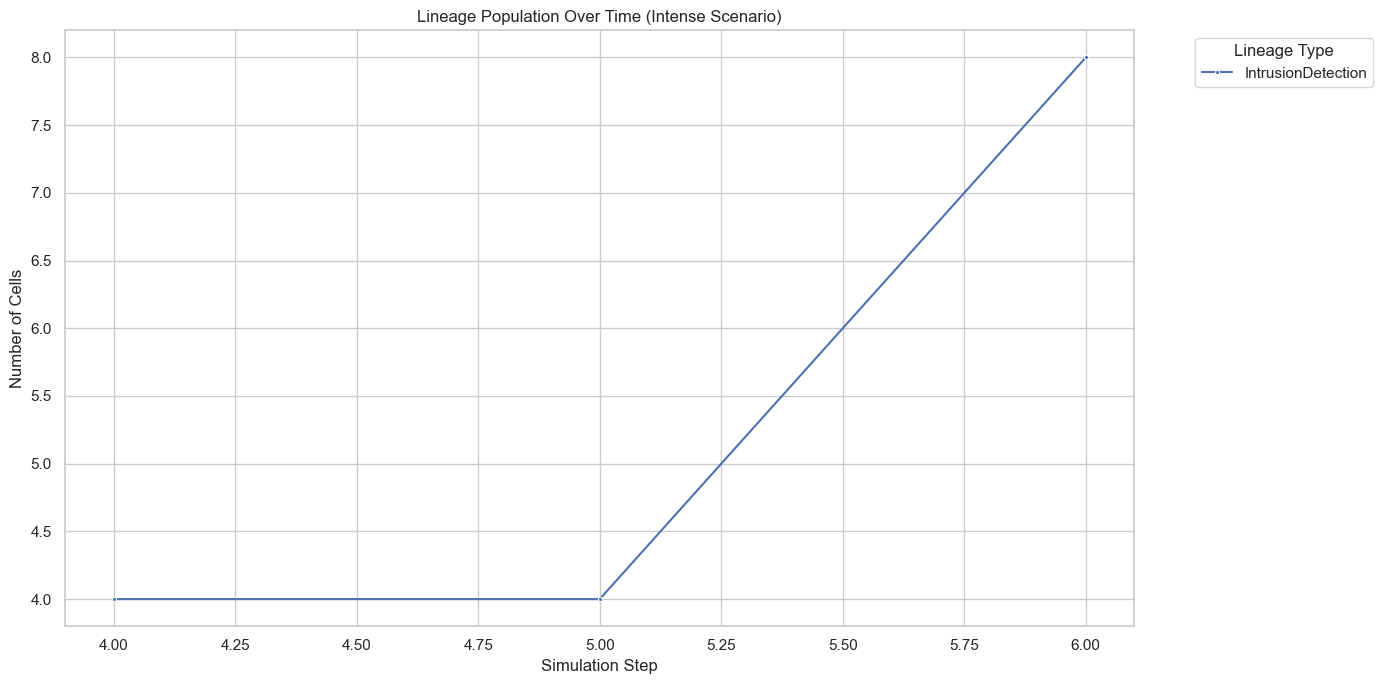

In [16]:
if not df_lineage.empty:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=df_lineage, x='step', y='count', hue='lineage', marker='.')
    plt.title('Lineage Population Over Time (Intense Scenario)')
    plt.xlabel('Simulation Step')
    plt.ylabel('Number of Cells')
    plt.legend(title='Lineage Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No lineage data to plot.")

### Analysis
This plot shows which cell lineages dominate at different points in the simulation. A successful attack might be one that quickly suppresses defensive lineages or promotes the growth of a specific adversarial lineage.

## 5. Lineage Entropy (Diversity)
We can calculate the Shannon entropy for the lineage populations at each step to get a single measure of diversity. Higher entropy means more diversity.

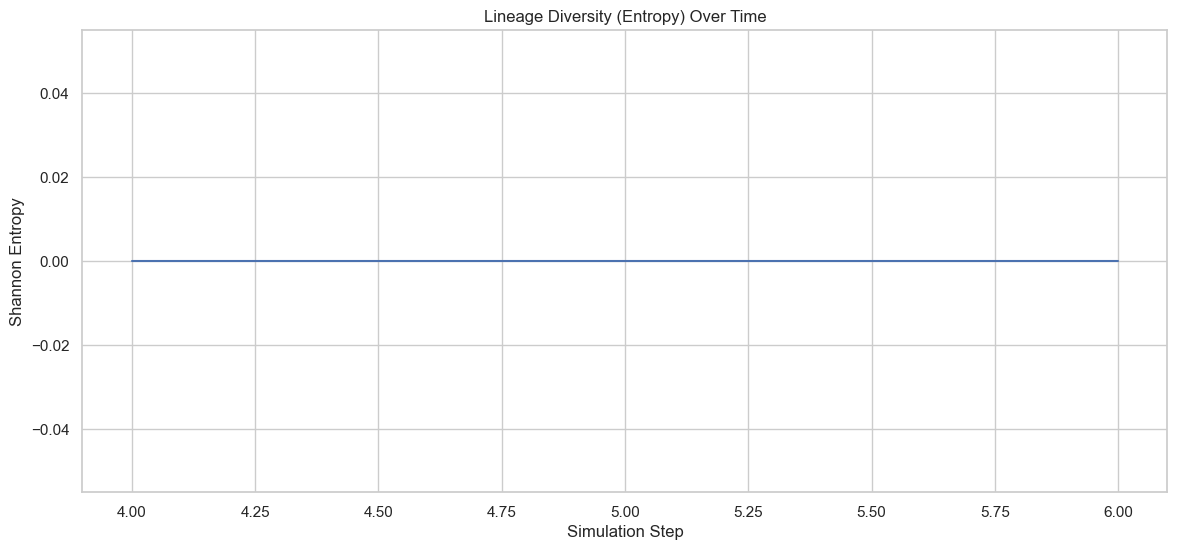

In [17]:
def calculate_entropy(df: pd.DataFrame) -> pd.DataFrame:
    """Calculate lineage entropy for each step."""
    entropy_data = []
    for step, group in df.groupby('step'):
        total_cells = group['count'].sum()
        if total_cells == 0:
            entropy = 0
        else:
            proportions = group['count'] / total_cells
            entropy = -np.sum(proportions * np.log2(proportions))
        entropy_data.append({'step': step, 'entropy': entropy})
    return pd.DataFrame(entropy_data)

if not df_lineage.empty:
    df_entropy = calculate_entropy(df_lineage)
    
    plt.figure(figsize=(14, 6))
    sns.lineplot(data=df_entropy, x='step', y='entropy')
    plt.title('Lineage Diversity (Entropy) Over Time')
    plt.xlabel('Simulation Step')
    plt.ylabel('Shannon Entropy')
    plt.show()
else:
    print("No lineage data for entropy calculation.")

### Analysis
This plot shows how the diversity of cell lineages changes over the simulation. A sharp drop in entropy might indicate that one lineage is taking over, which could be a sign of a successful attack or a strong defensive response.

## 6. Crossover Strategy Analysis

This section compares the results of two runs: one with no crossover and one with a high crossover rate. We will analyze the impact of crossover on fitness and diversity.

In [18]:
if not df_summary_no_crossover.empty and not df_summary_high_crossover.empty:
    df_summary_no_crossover['crossover'] = 'No Crossover'
    df_summary_high_crossover['crossover'] = 'High Crossover'
    df_crossover_comparison = pd.concat([df_summary_no_crossover, df_summary_high_crossover])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.lineplot(data=df_crossover_comparison, x='generation', y='fitness_score', hue='crossover', ax=ax1, marker='o')
    ax1.set_title('Fitness Score over Generations')
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Fitness Score')

    def get_all_lineage_data(run_dir: Path) -> pd.DataFrame:
        all_lineage_dfs = []
        for lineage_file in sorted(run_dir.glob('**/lineage.csv')):
            df = pd.read_csv(lineage_file)
            generation = 0
            if 'gen' in lineage_file.parts[-3]:
                try:
                    generation = int(lineage_file.parts[-3].split('gen')[1])
                except (IndexError, ValueError):
                    pass # stay at 0 if parsing fails
            df['generation'] = generation
            all_lineage_dfs.append(df)
        return pd.concat(all_lineage_dfs) if all_lineage_dfs else pd.DataFrame()

    df_lineage_no_crossover = get_all_lineage_data(NO_CROSSOVER_RUN_DIRECTORY)
    df_lineage_high_crossover = get_all_lineage_data(HIGH_CROSSOVER_RUN_DIRECTORY)

    if not df_lineage_no_crossover.empty and not df_lineage_high_crossover.empty:
        df_entropy_no_crossover = calculate_entropy(df_lineage_no_crossover)
        df_entropy_high_crossover = calculate_entropy(df_lineage_high_crossover)
        df_entropy_no_crossover['crossover'] = 'No Crossover'
        df_entropy_high_crossover['crossover'] = 'High Crossover'
        df_entropy_comparison = pd.concat([df_entropy_no_crossover, df_entropy_high_crossover])

        sns.lineplot(data=df_entropy_comparison, x='generation', y='entropy', hue='crossover', ax=ax2, marker='o')
        ax2.set_title('Lineage Diversity (Entropy) over Generations')
        ax2.set_xlabel('Generation')
        ax2.set_ylabel('Shannon Entropy')

    fig.suptitle('Impact of Crossover on Evolution')
    plt.show()
else:
    print("Not enough data for crossover comparison.")

Not enough data for crossover comparison.


## 7. Mutation Strategy Analysis

This section compares the results of runs with different mutation strategies.

In [19]:
if not df_summary_mutation.empty:
    df_summary_mutation['mutation'] = 'Random'
    df_mutation_comparison = pd.concat([df_summary_no_crossover, df_summary_high_crossover, df_summary_mutation])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.lineplot(data=df_mutation_comparison, x='generation', y='fitness_score', hue='mutation', ax=ax1, marker='o')
    ax1.set_title('Fitness Score over Generations')
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Shannon Entropy')

    df_lineage_mutation = get_all_lineage_data(MUTATION_ANALYSIS_RUN_DIRECTORY)

    if not df_lineage_mutation.empty:
        df_entropy_mutation = calculate_entropy(df_lineage_mutation)
        df_entropy_mutation['mutation'] = 'Random'
        df_entropy_comparison = pd.concat([df_entropy_no_crossover, df_entropy_high_crossover, df_entropy_mutation])

        sns.lineplot(data=df_entropy_comparison, x='generation', y='entropy', hue='mutation', ax=ax2, marker='o')
        ax2.set_title('Lineage Diversity (Entropy) over Generations')
        ax2.set_xlabel('Generation')
        ax2.set_ylabel('Shannon Entropy')

    fig.suptitle('Impact of Mutation on Evolution')
    plt.show()
else:
    print("Not enough data for mutation comparison.")

Not enough data for mutation comparison.


## 8. Adaptive Mutation Analysis

This section compares the results of runs with and without adaptive mutation.

In [20]:
if not df_summary_adaptive_true.empty and not df_summary_adaptive_false.empty:
    df_summary_adaptive_true['adaptive_mutation'] = 'True'
    df_summary_adaptive_false['adaptive_mutation'] = 'False'
    df_adaptive_mutation_comparison = pd.concat([df_summary_adaptive_true, df_summary_adaptive_false])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    sns.lineplot(data=df_adaptive_mutation_comparison, x='generation', y='fitness_score', hue='adaptive_mutation', ax=ax1, marker='o')
    ax1.set_title('Fitness Score over Generations')
    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Fitness Score')

    df_lineage_adaptive_true = get_all_lineage_data(ADAPTIVE_MUTATION_TRUE_RUN_DIRECTORY)
    df_lineage_adaptive_false = get_all_lineage_data(ADAPTIVE_MUTATION_FALSE_RUN_DIRECTORY)

    if not df_lineage_adaptive_true.empty and not df_lineage_adaptive_false.empty:
        df_entropy_adaptive_true = calculate_entropy(df_lineage_adaptive_true)
        df_entropy_adaptive_false = calculate_entropy(df_lineage_adaptive_false)
        df_entropy_adaptive_true['adaptive_mutation'] = 'True'
        df_entropy_adaptive_false['adaptive_mutation'] = 'False'
        df_entropy_comparison = pd.concat([df_entropy_adaptive_true, df_entropy_adaptive_false])

        sns.lineplot(data=df_entropy_comparison, x='generation', y='entropy', hue='adaptive_mutation', ax=ax2, marker='o')
        ax2.set_title('Lineage Diversity (Entropy) over Generations')
        ax2.set_xlabel('Generation')
        ax2.set_ylabel('Shannon Entropy')

    fig.suptitle('Impact of Adaptive Mutation on Evolution')
    plt.show()
else:
    print("Not enough data for adaptive mutation comparison.")

Not enough data for adaptive mutation comparison.
